# Librerías

In [1]:
#!pip install pysqlite3

In [20]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
from google.colab import files
import os
import sys

#Librerias estadísticas y de pruebas
import scipy.stats as stats
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots


# Conectar con google drive


In [3]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [4]:
#drive.flush_and_unmount()  #Linea en caso de tener que desconectar el drive por algún tipo de falla
drive.mount('/content/drive') #Linea para conectar al drive

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/analitica 3/sistemas_recomendacion" ### ruta del repositorio en drive
os.chdir(path) ### volver la carpeta del repositorio directorio de trabajo
sys.path.append(path) ### agregarla al path, poder leer archivos de funciones propios como paquetes

In [6]:
import funciones as fn

# Base de datos

In [7]:
conn = sql.connect('/content/drive/MyDrive/analitica 3/sistemas_recomendacion/data/db_movies3')
cur = conn.cursor()

In [8]:
# Creación de cursor para  ejecutar consultas en la base de datos
# Visualizar las tablas contenidas en la base de datos
cur.execute("SELECT name FROM sqlite_master where type='table'")
cur.fetchall()

[('movies_final',), ('ratings_final',), ('df_final',)]

## Carga de tabla en variable y visualización

In [11]:
cur.execute("SELECT * from df_final")
cur.fetchall()

[(1, 1, 4.0, 2000, 7, 30, 'Toy Story (1995)', 'Adventure', 1995.0),
 (1, 1, 4.0, 2000, 7, 30, 'Toy Story (1995)', 'Animation', 1995.0),
 (1, 1, 4.0, 2000, 7, 30, 'Toy Story (1995)', 'Children', 1995.0),
 (1, 1, 4.0, 2000, 7, 30, 'Toy Story (1995)', 'Comedy', 1995.0),
 (1, 1, 4.0, 2000, 7, 30, 'Toy Story (1995)', 'Fantasy', 1995.0),
 (1, 3, 4.0, 2000, 7, 30, 'Grumpier Old Men (1995)', 'Comedy', 1995.0),
 (1, 3, 4.0, 2000, 7, 30, 'Grumpier Old Men (1995)', 'Romance', 1995.0),
 (1, 6, 4.0, 2000, 7, 30, 'Heat (1995)', 'Action', 1995.0),
 (1, 6, 4.0, 2000, 7, 30, 'Heat (1995)', 'Crime', 1995.0),
 (1, 6, 4.0, 2000, 7, 30, 'Heat (1995)', 'Thriller', 1995.0),
 (1, 47, 5.0, 2000, 7, 30, 'Seven (a.k.a. Se7en) (1995)', 'Mystery', 1995.0),
 (1, 47, 5.0, 2000, 7, 30, 'Seven (a.k.a. Se7en) (1995)', 'Thriller', 1995.0),
 (1, 50, 5.0, 2000, 7, 30, 'Usual Suspects, The (1995)', 'Crime', 1995.0),
 (1, 50, 5.0, 2000, 7, 30, 'Usual Suspects, The (1995)', 'Mystery', 1995.0),
 (1, 50, 5.0, 2000, 7, 30, 'Usu

In [24]:
print("\nPrimeras 5 filas:")
df_final = pd.read_sql("SELECT * from df_final",conn)
df_final.head()


Primeras 5 filas:


,user_id,movie_id,rating,year_ratings,month,day,title,genres,year_movies
0,1,1,4.0,2000,7,30,Toy Story (1995),Adventure,1995.0
1,1,1,4.0,2000,7,30,Toy Story (1995),Animation,1995.0
2,1,1,4.0,2000,7,30,Toy Story (1995),Children,1995.0
3,1,1,4.0,2000,7,30,Toy Story (1995),Comedy,1995.0
4,1,1,4.0,2000,7,30,Toy Story (1995),Fantasy,1995.0


# Limpieza

# Cambio de tipo de variable

In [27]:
print(df_final.dtypes)

user_id           int64
movie_id          int64
rating          float64
year_ratings      int64
month             int64
day               int64
title            object
genres           object
year_movies     float64
dtype: object


Por medio del análisis de cada variable de identifica que "user_id", "movie_id" son variables categóricas y no numéricas, esto debido a que su función es de darle una identificación a cada usuario y película.

In [33]:
df_final['user_id'] = df_final['user_id'].astype('object')
df_final['movie_id'] = df_final['movie_id'].astype('object')
df_final['day'] = df_final['day'].astype('object')
df_final['month'] = df_final['month'].astype('object')
df_final.dtypes

,0
user_id,object
movie_id,object
rating,float64
year_ratings,int64
month,object
day,object
title,object
genres,object
year_movies,float64


## Identificación de duplicados y faltantes

In [47]:
def visual_check(df):
    pd.set_option('display.max_columns', None)

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    if df_fil_duplicated[1] == True:
        print("Filas duplicadas:\n",df_fil_duplicated,'\n\n')
    else:
        print('Filas duplicadas:\nNo hay filas duplicadas\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

visual_check(df_final)

Shape:
 (227186, 9) 

Data Types:
 user_id          object
movie_id         object
rating          float64
year_ratings    float64
month            object
day              object
title            object
genres           object
year_movies     float64
dtype: object 


Columnas duplicadas:
 [False False False False False False False False False] 


Filas duplicadas:
No hay filas duplicadas


Datos faltantes por columnas:
 Index([], dtype='object') 




## Datos atípicos

In [48]:
#Identificacion de atipicos de manera grafica

def visual_outliers(df):
    numeric_cols = df.select_dtypes(include='number').columns

    # Boxplot
    df_comparison = pd.DataFrame()

    # Llenar el DataFrame con las columnas originales
    for col in numeric_cols:
        df_comparison[f'{col}_original'] = df_final[col]  # Columna original
    num_vars = len(numeric_cols)

    # Determinar el número de filas y columnas para el diseño del subplot
    n_cols = 2
    n_rows = (num_vars + n_cols - 1) // n_cols  # Número de filas necesario

    #boxplots solo para los datos originales
    plt.figure(figsize=(12, 5 * n_rows))
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df_comparison[[f'{col}_original']])
        plt.title(f'Boxplot de {col} Original', fontsize=14)
        plt.xticks([0], ['Original'], fontsize=12)
        plt.xlabel('')
        plt.ylabel('Valor', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Histogramas
    n_cols = 2
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_cols],shared_yaxes=True)
    for i, column in enumerate(numeric_cols):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red')), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=300 * n_rows, width=800, title_text="Histogramas variables numéricas con KDE")
    fig_hist.show()

visual_outliers(df_final)

Output hidden; open in https://colab.research.google.com to view.

In [49]:
# Identificacion de atipicos de variables numericas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
outliers_count = {}

# Identificar y contar atipicos usando IQR
for col in numeric_cols:
    col_data = df_final[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_final[col] < lower_bound) | (df_final[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Creacion un DataFrame con las cantidades de atipicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

       Variable  Cantidad de Atípicos
0        rating                     0
1  year_ratings                     0
2   year_movies                  9591


In [46]:
# prompt: Imputación de atípicos con la media

import numpy as np
# Imputación de atípicos con la media
def impute_outliers_with_mean(df, column):
    """
    Imputa los valores atípicos de una columna con la media de la columna.

    Args:
        df: DataFrame de pandas.
        column: Nombre de la columna a imputar.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if column not in numeric_cols:
        print(f"La columna '{column}' no es numérica.")
        return df

    col_data = df[column].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar y reemplazar los valores atípicos con la media
    mean_value = col_data.mean()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df


# Ejemplo de uso (reemplaza 'rating' con el nombre de tu columna)
for col in numeric_cols:
    df_final = impute_outliers_with_mean(df_final, col)

print(df_final.head())


  user_id movie_id  rating  year_ratings month day             title  \
0       1        1     4.0        2000.0     7  30  Toy Story (1995)   
1       1        1     4.0        2000.0     7  30  Toy Story (1995)   
2       1        1     4.0        2000.0     7  30  Toy Story (1995)   
3       1        1     4.0        2000.0     7  30  Toy Story (1995)   
4       1        1     4.0        2000.0     7  30  Toy Story (1995)   

      genres  year_movies  
0  Adventure       1995.0  
1  Animation       1995.0  
2   Children       1995.0  
3     Comedy       1995.0  
4    Fantasy       1995.0  


<ipython-input-46-75d8485e7473>:29: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2007.685513191834' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



## Pruebas de normalidad de algunas variables relevantes

In [38]:
#Prueba de normalidad estadistica

def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
variables = numeric_cols
prueba_normalidad(df_final, variables)

Prueba de Normalidad de Shapiro-Wilk para rating:
Estadístico: 0.9287996397778734, Valor-p: 1.3210020596455602e-119
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para year_ratings:
Estadístico: 0.9334985808285998, Valor-p: 1.1555185211291349e-117
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para year_movies:
Estadístico: 0.8651177833168331, Valor-p: 1.467805515228787e-138
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 227186.



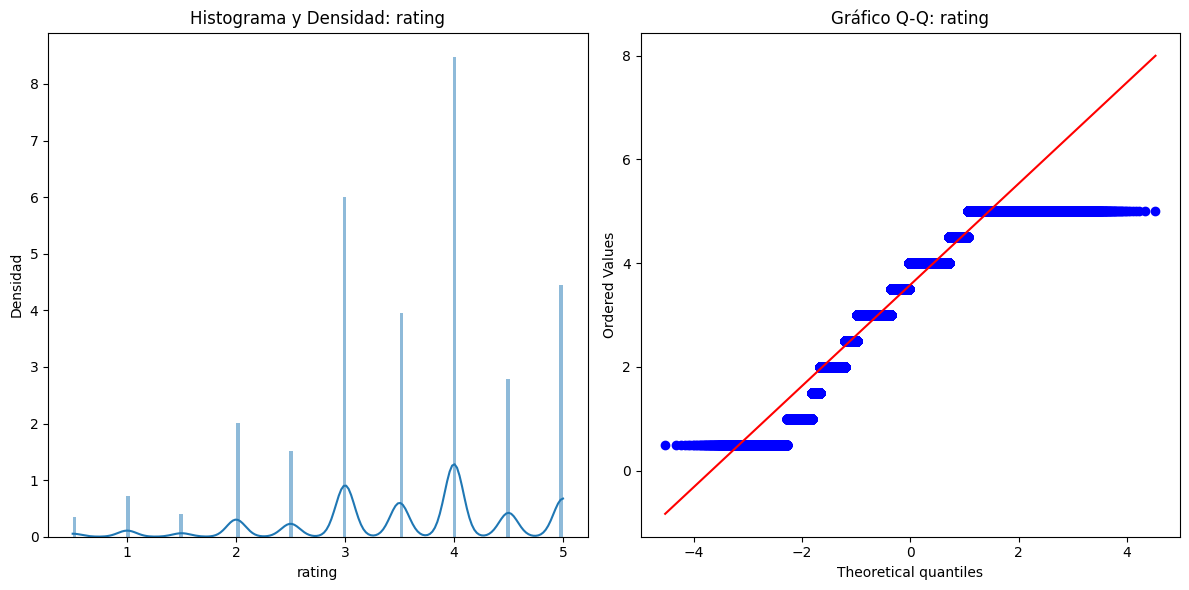

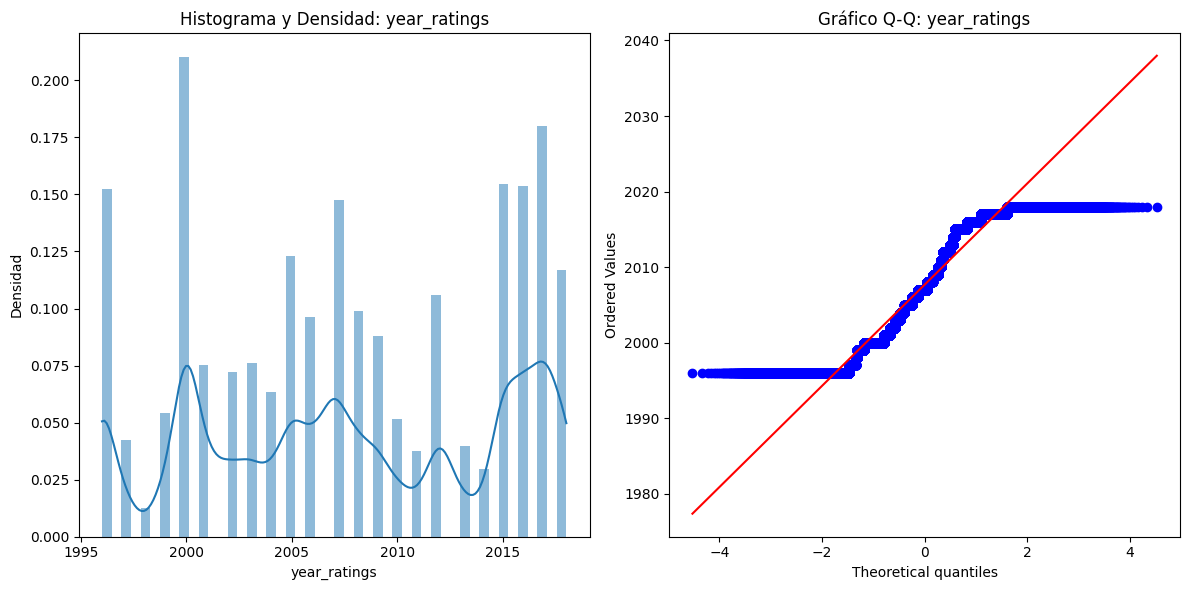

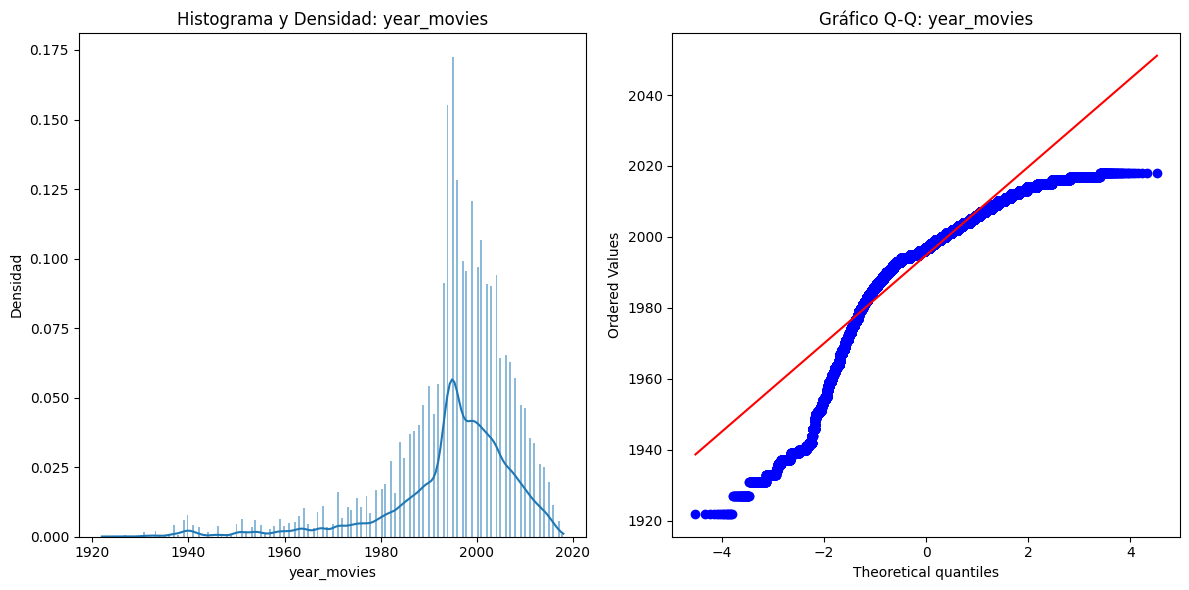

In [39]:
#Prueba de normalidad grafica

def evaluar_normalidad(df, variables):

    for var in variables:
        plt.figure(figsize=(12, 6))

        # Histograma con línea de densidad
        plt.subplot(1, 2, 1)
        sns.histplot(df[var], kde=True, stat='density', linewidth=0)
        plt.title(f'Histograma y Densidad: {var}')
        plt.xlabel(var)
        plt.ylabel('Densidad')

        # Gráfico Q-Q
        plt.subplot(1, 2, 2)
        stats.probplot(df[var].dropna(), dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q: {var}')

        plt.tight_layout()
        plt.show()

evaluar_normalidad(df_final, variables)

### Transformación de los datos en busca de distribución normal

In [40]:
#Copia de dataframe para modificar
dfc_transformado = df_final.copy()

# Aplicar las transformaciones logarítmicas sobre la copia
dfc_transformado['rating'] = np.log1p(dfc_transformado['rating'])
dfc_transformado['year_ratings'] = np.log1p(dfc_transformado['year_ratings'])
dfc_transformado['year_movies'] = np.log1p(dfc_transformado['year_movies'])

dfc_transformado[['rating', 'year_ratings', 'year_movies']] = StandardScaler().fit_transform(dfc_transformado[['rating', 'year_ratings', 'year_movies']])  # Estandarización

In [44]:
numeric = dfc_transformado.select_dtypes(include=[np.number]).columns
def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
prueba_normalidad(dfc_transformado, numeric)

Prueba de Normalidad de Shapiro-Wilk para rating:
Estadístico: 0.8476193519810791, Valor-p: 2.4387775872769106e-142
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para year_ratings:
Estadístico: 0.9335299894374999, Valor-p: 1.1916728658777745e-117
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para year_movies:
Estadístico: 0.8612136083647906, Valor-p: 1.9371775865942655e-139
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 227186.

